# Figures for CCN, AAAI, and NBDT

In [2]:
import os
import csv
import numpy as np
import torch as th
import scipy.stats as st
import pandas as pd

from glob import glob

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import load_evaluated
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

from IPython.display import Image

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('axes', titlesize=16)

# Load data 

- All figures

In [3]:
path = "/Users/qualia/Code/azad/data/wythoff/exp13/"
results_path = "/Users/qualia/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp15/"

exp_15 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_15.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp16/"

exp_16 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_16.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp17/"

exp_17 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_17.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp18/"

exp_18 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_18.append(mon)

In [4]:
episode_13, exp_13_avg, exp_13_sem = score_summary(exp_13)
episode_14, exp_14_avg, exp_14_sem = score_summary(exp_14)
episode_15, exp_15_avg, exp_15_sem = score_summary(exp_15)
episode_16, exp_16_avg, exp_16_sem = score_summary(exp_16)
episode_18, exp_18_avg, exp_18_sem = score_summary(exp_18)

In [5]:
path = "/Users/qualia/Code/azad/data/wythoff/exp36/"

exp_36 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_36.append(mon)

path = "/Users/qualia/Code/azad/data/wythoff/exp38/"
files = []
exp_38 = []
runs = range(1, 21)
for r in runs:
    fi = os.path.join(path, "run_{}_monitor.csv".format(r))
    files.append(fi)
for fi in files:
    mon = load_monitored(fi)
    exp_38.append(mon)

In [6]:
episode_36, exp_36_avg, exp_36_sem = score_summary(exp_36)
episode_38, exp_38_avg, exp_38_sem = score_summary(exp_38)

In [7]:
def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

path = "/Users/qualia/Code/azad/data/wythoff/exp30/"
exp_30 = load_stumbler_data(path)
grid_30 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/qualia/Code/azad/data/wythoff/exp31/"
exp_31 = load_stumbler_data(path)
grid_31 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/qualia/Code/azad/data/wythoff/exp32/"
exp_32 = load_stumbler_data(path)
grid_32 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/qualia/Code/azad/data/wythoff/exp33"
exp_33 = load_stumbler_data(path, (0, 10))
grid_33 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/qualia/Code/azad/data/wythoff/exp34/"
exp_34 = load_stumbler_data(path, (0, 10))
grid_34 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/qualia/Code/azad/data/wythoff/exp35/"
exp_35 = load_stumbler_data(path)
grid_35 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

In [8]:
# Join the data into a three col table: (run_code, param, max(score[-1:-100])
# Add default data (exp_14)
exps = [exp_14, exp_35, exp_30, exp_31, exp_32, exp_33, exp_34]
params = [
    "Baseline",
    "Epsilon",
    "Influence learning rate", 
    "Stumbler learning rate", 
    "Strategist learning rate", 
    "Hot threshold",
    "Cold threshold",
]
rename_params = [
    "Baseline",
    "Epsilon",
    "Influence learning rate", 
    "Stumbler learning rate", 
    "Strategist learning rate", 
    "Good threshold",
    "Bad threshold",
]

exp_30_35 = {
    "run_code" : [], 
    "param" : [], 
    "max_score" : [], 
    "mean_score" : [], 
    "median_score" : []}
for param, rename, exp in zip(params, rename_params, exps):
    for run_code, mon in enumerate(exp):
        exp_30_35["run_code"].append(run_code)
        exp_30_35["max_score"].append(np.max(mon["score"][-100:-1]))
        exp_30_35["mean_score"].append(np.mean(mon["score"]))
        exp_30_35["median_score"].append(np.median(mon["score"]))
        exp_30_35["param"].append(rename)
        
exp_30_35 = pd.DataFrame(exp_30_35)
exp_30_35.head()

,run_code,param,max_score,mean_score,median_score
0,0,Baseline,0.863015,0.812589,0.846872
1,1,Baseline,0.871301,0.825212,0.857563
2,2,Baseline,0.836599,0.790218,0.818950
3,3,Baseline,0.766403,0.697258,0.735031
4,4,Baseline,0.730890,0.685279,0.712667


In [9]:
exp_24_games = [
    ("Wythoff15x15", 15),
    ("Wythoff50x50", 50),
    ("Wythoff100x100", 100),
    ("Wythoff150x150", 150),
    ("Wythoff200x200", 200),
    ("Wythoff250x250", 250),
    ("Wythoff300x300", 300),
    ("Wythoff350x350", 350),
    ("Wythoff400x400", 400),
    ("Wythoff450x450", 450),
    ("Wythoff500x500", 500)
]

# GREEDY
path = "/Users/qualia/Code/azad/data/wythoff/exp24a/"
exp_24_a = {}
for game in exp_24_games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    value = load_evaluated(files, game[1])
    exp_24_a[game] = value
    
# RANDOM
path = "/Users/qualia/Code/azad/data/wythoff/exp24b/"
exp_24_b = {}
for game in exp_24_games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    value = load_evaluated(files, game[1])
    exp_24_b[game] = value

In [10]:
# Exp 6
path = "/Users/qualia/Code/azad/data/wythoff/exp6/"
files = sorted(glob(os.path.join(path, "run_*")))

# Process 'em
exp_6 = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # Load data
    model = th.load(fi)
    row = (
        row_code, 
        model['gamma'], 
        model['epsilon'], 
        model['learning_rate_stumbler'],
        model['stumbler_score']
    ) 
    exp_6.append(row)

In [11]:
# exp 7
path = "/Users/qualia/Code/azad/data/wythoff/exp7/"
files = sorted(glob(os.path.join(path, "run_*")))

exp_7 = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['learning_rate_strategist'],
        model['num_stumbles'],
        model['num_strategies'],
        model['stumbler_score'],
        model['strategist_score'],
        model['influence']
    )
    exp_7.append(row)

In [12]:
# Exp 11
path = "/Users/qualia/Code/azad/data/wythoff/exp11/"
files = sorted(glob(os.path.join(path, "run_*")))

exp_11 = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['learning_rate_influence'],
        model['stumbler_score'],
        model['strategist_score'],
        model['influence']
    )
    exp_11.append(row)

In [13]:
# Exp 8
# Find the files
path = "/Users/qualia/Code/azad/data/wythoff/exp8/"
files = sorted(glob(os.path.join(path, "run_*")))

exp_8 = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['hot_threshold'],
        model['cold_threshold'],
        model['strategist_score'],
        model['influence']
    )
    exp_8.append(row)

In [14]:
# Exps 25-28
path = "/Users/qualia/Code/azad/data/wythoff/exp25/"
exp_25 = load_stumbler_data(path, (1, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp26/"
exp_26 = load_stumbler_data(path, (1, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp27/"
exp_27 = load_stumbler_data(path, (1, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp28/"
exp_28 = load_stumbler_data(path, (1, 21))

episode_25, exp_25_avg, exp_25_sem = score_summary(exp_25, key="total_reward")
episode_26, exp_26_avg, exp_26_sem = score_summary(exp_26, key="total_reward")
episode_27, exp_27_avg, exp_27_sem = score_summary(exp_27, key="total_reward")
episode_28, exp_28_avg, exp_28_sem = score_summary(exp_28, key="total_reward")

# Renorm
exp_25_avg = exp_25_avg/np.max(episode_25)
exp_26_avg = exp_26_avg/np.max(episode_26)
exp_27_avg = exp_27_avg/np.max(episode_27)
exp_28_avg = exp_28_avg/np.max(episode_28)

exp_25_sem = exp_25_sem/np.max(episode_25)
exp_26_sem = exp_26_sem/np.max(episode_26)
exp_27_sem = exp_27_sem/np.max(episode_27)
exp_28_sem = exp_28_sem/np.max(episode_28)

In [15]:
# Define new loaders for exp55 and beyond
def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

def load_eval(path, name="self", run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "eval_{}_{}_monitor.csv".format(name, int(r)))
        try:
            mon = load_monitored(file)
#             for k,v in mon.items():
#                 mon[k] = [v[-1]] # Drop all but the final value
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

In [16]:
# Load DQN learning (exp) and eval (self, random) 
path = "/Users/qualia/Code/azad/data/wythoff/exp56/"
exp_56 = load_data(path, run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp58/"
exp_58 = load_data(path, run_index=(2, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp56/"
self_56 = load_eval(path, name="self", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp58/"
self_58 = load_eval(path, name="self", run_index=(2, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp55/"
random_56 = load_eval(path, name="random", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp57/"
random_58 = load_eval(path, name="random", run_index=(2, 21))

# Figures

## Fig 1. 
a. Network diagram.

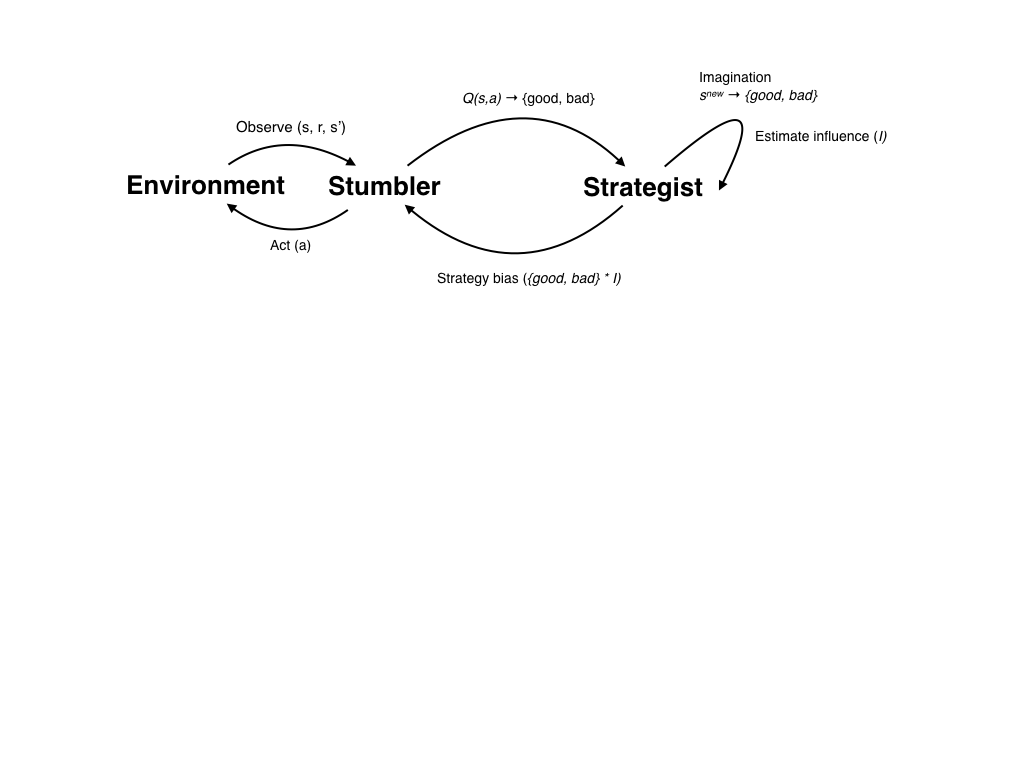

In [17]:
!cp '/Users/qualia/Documents/Conferences/CCN2018/CCN2018_figures/heuristic_CCN_figures/heuristic_CCN_figures.001.png' 'figure_1.png'
Image(filename='figure_1.png')

## Fig 2.
a. Game diagram b. Optimal move squares

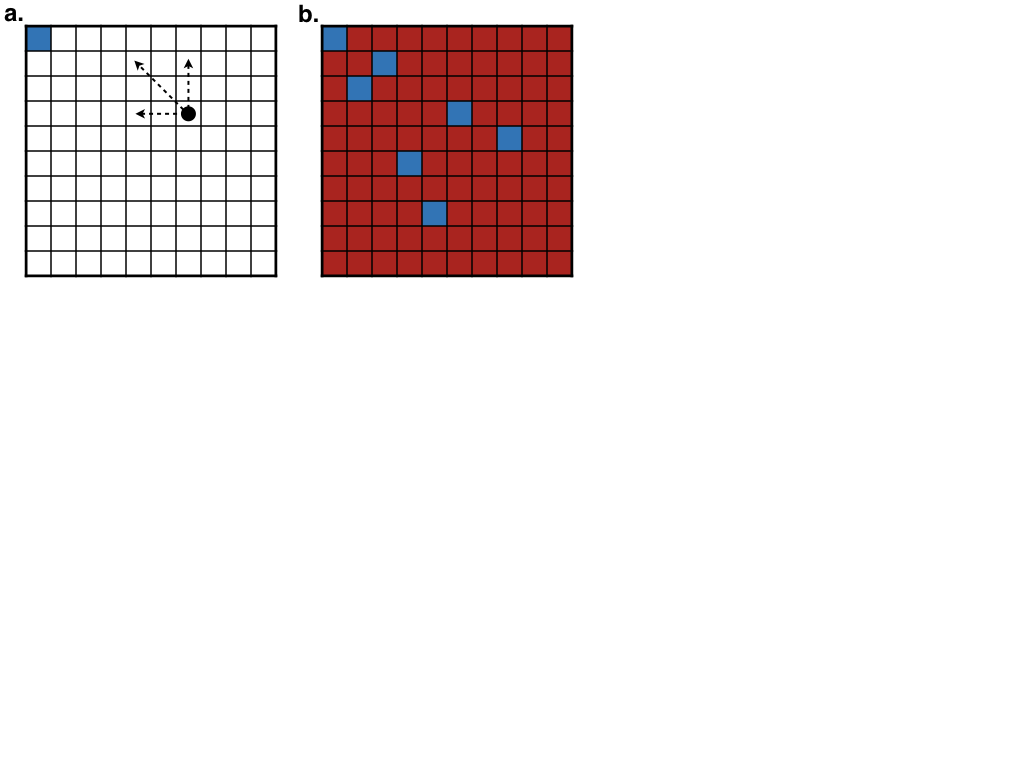

In [18]:
!cp '/Users/qualia/Documents/Conferences/CCN2018/CCN2018_figures/heuristic_CCN_figures/heuristic_CCN_figures.002.png' 'figure_2.png'
Image(filename='figure_2.png')

## Fig 3. 

a. Strategist learning demo

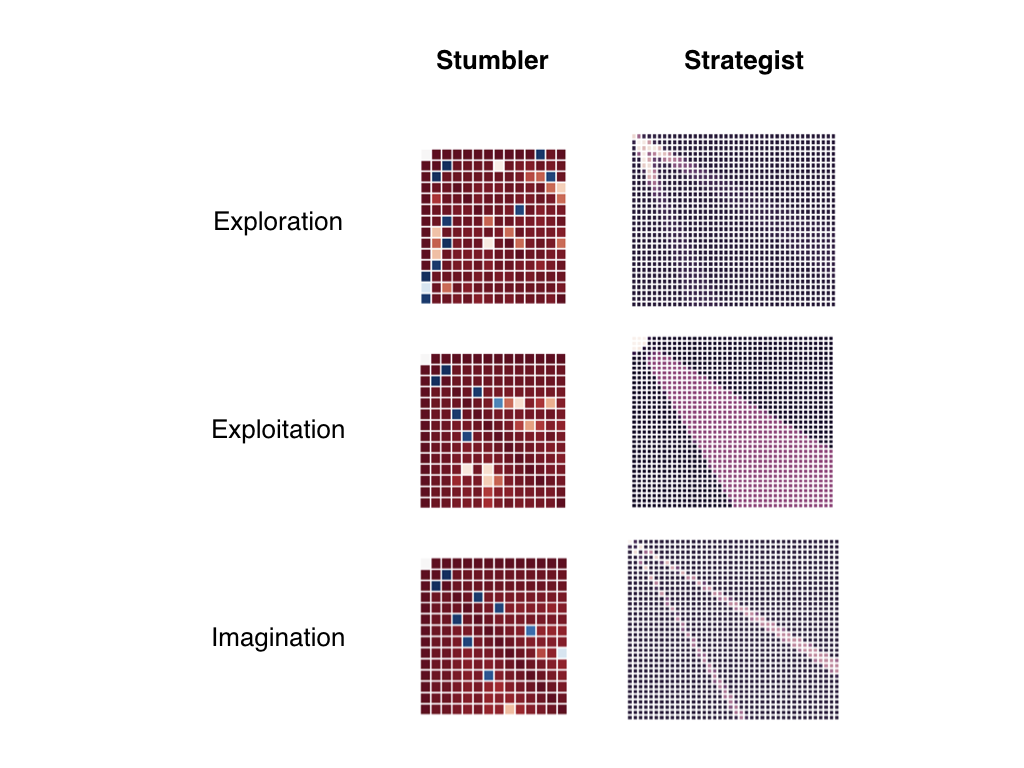

In [19]:
!cp '/Users/qualia/Documents/Conferences/CCN2018/CCN2018_figures/heuristic_CCN_figures/heuristic_CCN_figures.003.png' 'figure_3.png'
Image(filename='figure_3.png')

## Fig 4. 
a. Learning optimal moves in Wythoff's game with (black) and without (goldenrod) strategist layer. b. An optimal strategist compared to the learned strategist. Error bars denote `2*SEM` based on 20 duplicate runs with different intial random seeds.

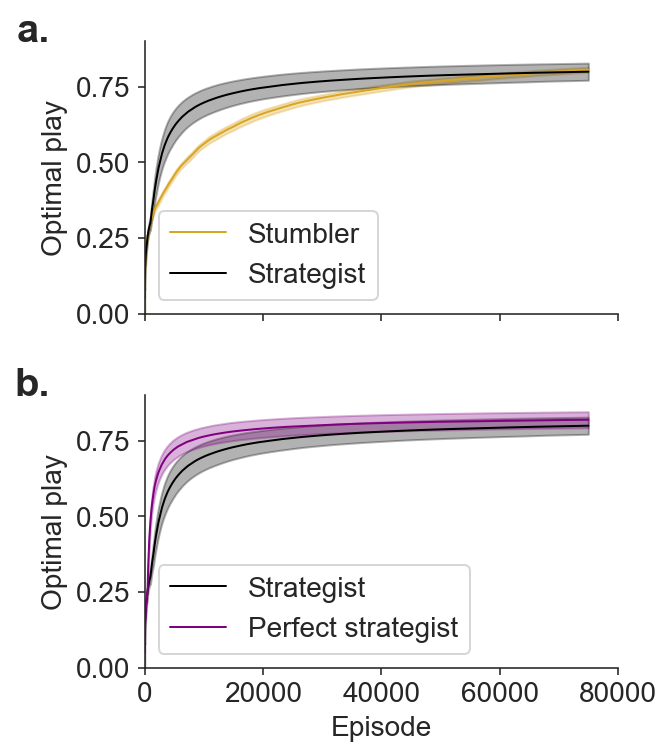

In [20]:
# plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 5.5))

# A
_ = ax[0].plot(episode_13, exp_13_avg, linestyle="-", color='goldenrod', alpha=1.0, linewidth=1, label="Stumbler")
_ = ax[0].fill_between(episode_13, 
                       exp_13_avg + 2*exp_13_sem, 
                       exp_13_avg - 2*exp_13_sem,
                       color='goldenrod', alpha=0.3)

_ = ax[0].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[0].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[0].legend()
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_ylim(0, 0.9)
_ = ax[1].set_xlim(0, 80000)
_ = ax[0].text(-0.2, 1.1, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# B
_ = ax[1].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[1].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[1].plot(episode_18, exp_18_avg, color='purple', alpha=1, linewidth=1, label="Perfect strategist")
_ = ax[1].fill_between(episode_18, 
                       exp_18_avg + 2*exp_18_sem, 
                       exp_18_avg - 2*exp_18_sem,
                       color='purple', alpha=0.3)
_ = ax[1].legend()
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_ylim(0, 0.9)
_ = ax[1].set_xlim(0, 80000)
_ = ax[1].text(-0.2, 1.1, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Tweaks
_ = fig.tight_layout()
_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)

plt.savefig("figure_4.png", dpi=500, bbox_inches='tight')

## Fig 5.
a. Sensitivity of final model perfromance on select model hyper-parameters. b. Effect of sampling only good or only bad board positions (blue), compated to both (the default, black).

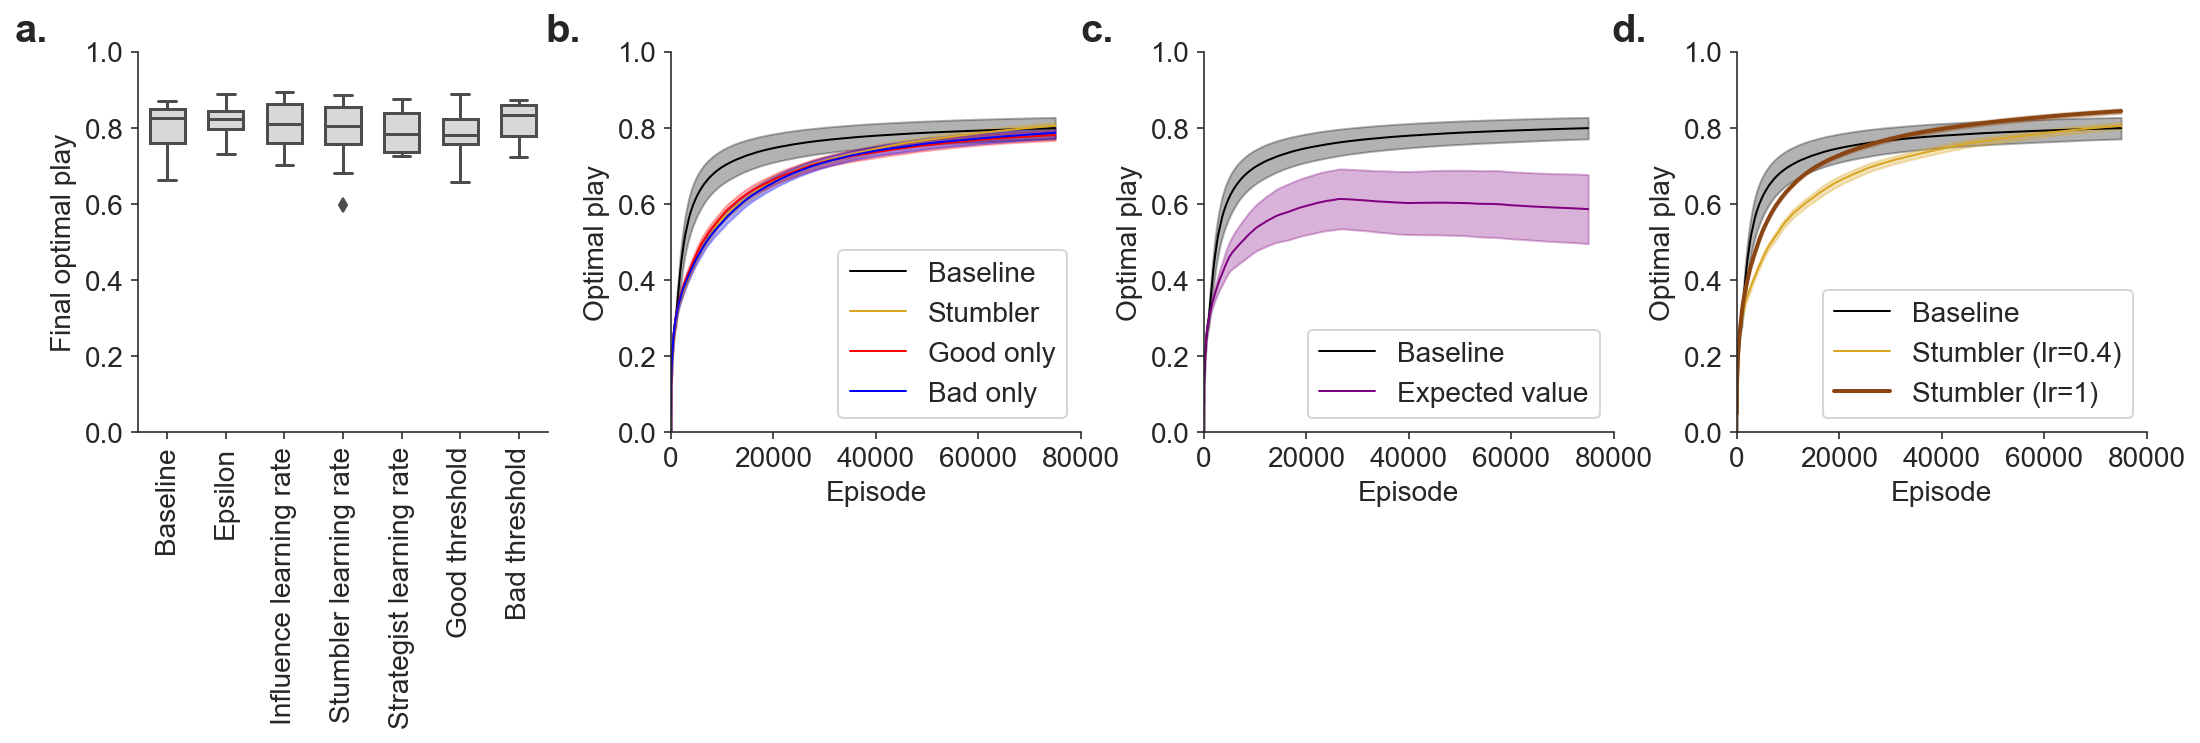

In [21]:
# Param sensitivity
fig, ax = plt.subplots(1, 4, figsize=(18, 3.5))
_ = sns.boxplot(x="param", y="max_score", data=exp_30_35, 
                color="grey", width=0.6, ax=ax[0])
for patch in ax[0].artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
# # _ = sns.violinplot(x="param", y="max_score", data=exp_30_35, 
# #                 color="lightgrey", width=0.8, ax=ax[0])
# _ = sns.stripplot(x="param", y="max_score", data=exp_30_35, 
#                   color="black", alpha=0.8, size=4, jitter=True, ax=ax[0])

_ = ax[0].set_ylim(0, 1)
_ = ax[0].set_xlabel("")
_ = ax[0].set_ylabel("Final optimal play")
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].text(-0.22, 1.1, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# H / C 
_ = ax[1].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Baseline")
_ = ax[1].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[1].plot(episode_13, exp_13_avg, color='goldenrod', alpha=1, linewidth=1, label="Stumbler")
_ = ax[1].fill_between(episode_13, 
                       exp_13_avg + 2*exp_13_sem, 
                       exp_13_avg - 2*exp_13_sem,
                       color='goldenrod', alpha=0.3)
_ = ax[1].plot(episode_15, exp_15_avg, color='red', alpha=1, linewidth=1, label="Good only")
_ = ax[1].fill_between(episode_15, 
                       exp_15_avg + 2*exp_15_sem, 
                       exp_15_avg - 2*exp_15_sem,
                       color='red', alpha=0.3)
_ = ax[1].plot(episode_16, exp_16_avg, color='blue', alpha=1, linewidth=1, label="Bad only")
_ = ax[1].fill_between(episode_16, 
                       exp_16_avg + 2*exp_16_sem, 
                       exp_16_avg - 2*exp_16_sem,
                       color='blue', alpha=0.3)

_ = ax[1].legend()
_ = ax[1].set_ylim(0, 1)
_ = ax[1].set_xlim(0, 80000)
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].text(-0.22, 1.1, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Expected value
_ = ax[2].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Baseline")
_ = ax[2].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[2].plot(episode_36, exp_36_avg, color='purple', alpha=1, linewidth=1, label="Expected value")
_ = ax[2].fill_between(episode_13, 
                       exp_36_avg + 2*exp_36_sem, 
                       exp_36_avg - 2*exp_36_sem,
                       color='purple', alpha=0.3)

_ = ax[2].legend(loc='lower right')
_ = ax[2].set_ylim(0, 1)
_ = ax[2].set_xlim(0, 80000)
_ = ax[2].set_xlabel("Episode")
_ = ax[2].set_ylabel("Optimal play")
_ = ax[2].text(-0.22, 1.1, "c.", transform=ax[2].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# High lr
_ = ax[3].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Baseline")
_ = ax[3].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[3].plot(episode_13, exp_13_avg, color='goldenrod', alpha=1, linewidth=1, label="Stumbler (lr=0.4)")
_ = ax[3].fill_between(episode_13, 
                       exp_13_avg + 2*exp_13_sem, 
                       exp_13_avg - 2*exp_13_sem,
                       color='goldenrod', alpha=0.3)
_ = ax[3].plot(episode_38, exp_38_avg, color='saddlebrown', alpha=1, linewidth=2, label="Stumbler (lr=1)")
_ = ax[3].fill_between(episode_13, 
                       exp_38_avg + 2*exp_38_sem, 
                       exp_38_avg - 2*exp_38_sem,
                       color='saddlebrown', alpha=0.3)

_ = ax[3].legend(loc='lower right')
_ = ax[3].set_ylim(0, 1)
_ = ax[3].set_xlim(0, 80000)
_ = ax[3].set_xlabel("Episode")
_ = ax[3].set_ylabel("Optimal play")
_ = ax[3].text(-0.22, 1.1, "d.", transform=ax[3].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')


# Tweaks
sns.despine()
# _ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=0.75, wspace=0.3)

plt.savefig("figure_5.png", dpi=500, bbox_inches='tight')

## Fig 6.
a-b. Transfer to new game boards. Optimal play for the stumbler and strategist layers independents on testing boards larger than the orignal 50x50 strategist training board, for both a greedy stumbler (a, goldenrod) and a random stumbler (b, blue). c. Fraction of strategist wins when playing against both stumblers. 

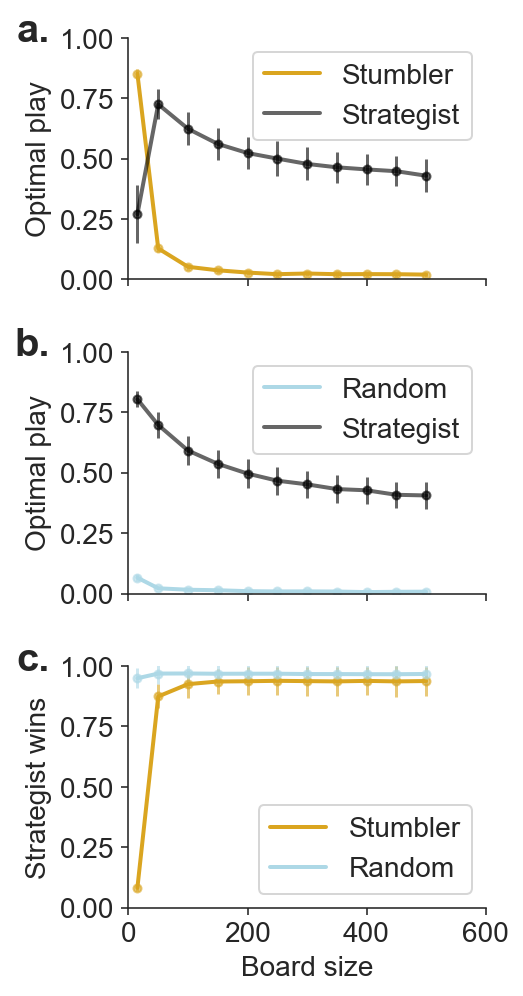

In [22]:
# fig, ax = plt.subplots(2, sharex=True, figsize=(4.5, 5.75))
fig, ax = plt.subplots(3, sharex=True, figsize=(4*0.8, 10*0.8))

# --------------------------------------------------------------
# SCORES

# GREEDY:
# Stumbler
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["stumbler_score"]))
    s.append(2*st.sem(v["stumbler_score"]))
_ = ax[0].errorbar(x=g, y=m, yerr=s, fmt='o', color='goldenrod', alpha=0.6, markersize=4)
_ = ax[0].plot(g, m, linestyle="-", linewidth=2, color='goldenrod',  alpha=1.0, label="Stumbler")

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["strategist_score"]))
    s.append(2*st.sem(v["strategist_score"]))
_ = ax[0].errorbar(x=g, y=m, yerr=s, fmt='o', color='black', alpha=0.6, markersize=4)
_ = ax[0].plot(g, m, '-', color='black', linewidth=2, alpha=0.6, label="Strategist")

_ = ax[0].legend()
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_ylim(0, 1.0)
_ = ax[2].set_xlim(0, 500)
_ = ax[0].text(-0.22, 1.1, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# RANDOM:
# Stumbler
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["stumbler_score"]))
    s.append(2*st.sem(v["stumbler_score"]))
_ = ax[1].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[1].plot(g, m, linestyle="-", linewidth=2, color='lightblue', label="Random")

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["strategist_score"]))
    s.append(2*st.sem(v["strategist_score"]))
_ = ax[1].errorbar(x=g, y=m, yerr=s, fmt='o', color='black', alpha=0.6, markersize=4)
_ = ax[1].plot(g, m, '-', color='black', linewidth=2, alpha=0.6, label="Strategist")

_ = ax[1].legend()
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_ylim(0, 1.0)
_ = ax[1].set_xlim(0, 500)
_ = ax[1].text(-0.22, 1.1, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# --------------------------------------------------------------
# WINS
n_eval = 1000.0

# Greedy
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["wins"])/n_eval)
    s.append(2*st.sem(v["wins"])/n_eval)
_ = ax[2].errorbar(x=g, y=m, yerr=s, fmt='o', color='goldenrod', alpha=0.6, markersize=4)
_ = ax[2].plot(g, m, linestyle="-", linewidth=2, color='goldenrod', alpha=1, label="Stumbler")

# Random
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["wins"])/n_eval)
    s.append(2*st.sem(v["wins"])/n_eval)
_ = ax[2].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[2].plot(g, m, linestyle="-", linewidth=2, color='lightblue', label="Random")
_ = ax[2].text(-0.22, 1.1, "c.", transform=ax[2].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[2].legend()
_ = ax[2].set_xlabel("Board size")
_ = ax[2].set_ylabel("Strategist wins")
_ = ax[2].set_ylim(0, 1)
_ = ax[2].set_xlim(0, 600)

_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)

plt.savefig("figure_6.png", dpi=500, bbox_inches='tight')

## Fig 7.

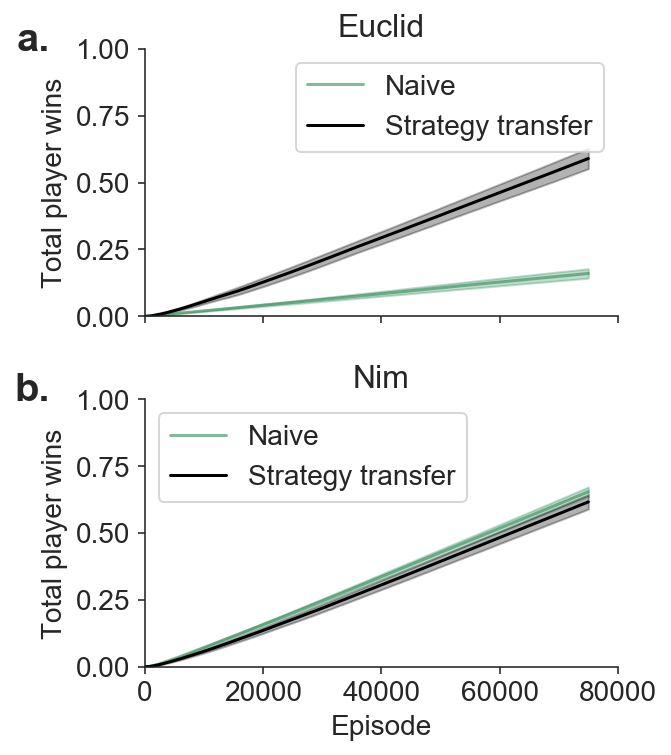

In [23]:
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 5.5))
_ = ax[0].plot(episode_26, exp_26_avg, color="seagreen", alpha=0.6, label="Naive")
_ = ax[0].fill_between(episode_26, 
                       exp_26_avg + 2*exp_26_sem, 
                       exp_26_avg - 2*exp_26_sem,
                       color='seagreen', alpha=0.3)

_ = ax[0].plot(episode_28, exp_28_avg, color="black", alpha=1, label="Strategy transfer")
_ = ax[0].fill_between(episode_28, 
                       exp_28_avg + 2*exp_28_sem, 
                       exp_28_avg - 2*exp_28_sem,
                       color='black', alpha=0.3)
_ = ax[0].set_title("Euclid")
_ = ax[0].legend()
# _ = ax[0].set_xlabel("Episode")
_ = ax[0].set_ylabel("Total player wins")
_ = ax[0].set_ylim(0, 1)
_ = ax[0].set_xlim(0, 80000)
_ = ax[0].text(-0.2, 1.1, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')


_ = ax[1].plot(episode_25, exp_25_avg, color="seagreen", alpha=0.6, label="Naive")
_ = ax[1].fill_between(episode_25, 
                       exp_25_avg + 2*exp_25_sem, 
                       exp_25_avg - 2*exp_25_sem,
                       color='seagreen', alpha=0.3)

_ = ax[1].plot(episode_27, exp_27_avg, color="black", alpha=1, label="Strategy transfer")
_ = ax[1].fill_between(episode_27, 
                       exp_27_avg + 2*exp_27_sem, 
                       exp_27_avg - 2*exp_27_sem,
                       color='black', alpha=0.3)
_ = ax[1].legend()
_ = ax[1].set_title("Nim")
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Total player wins")
_ = ax[1].set_ylim(0, 1)
_ = ax[1].set_xlim(0, 80000)
_ = ax[1].text(-0.2, 1.1, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)
_ = plt.tight_layout()

plt.savefig("figure_7.png", dpi=500, bbox_inches='tight')

# Fig 8.
Hyperparameter tuning.

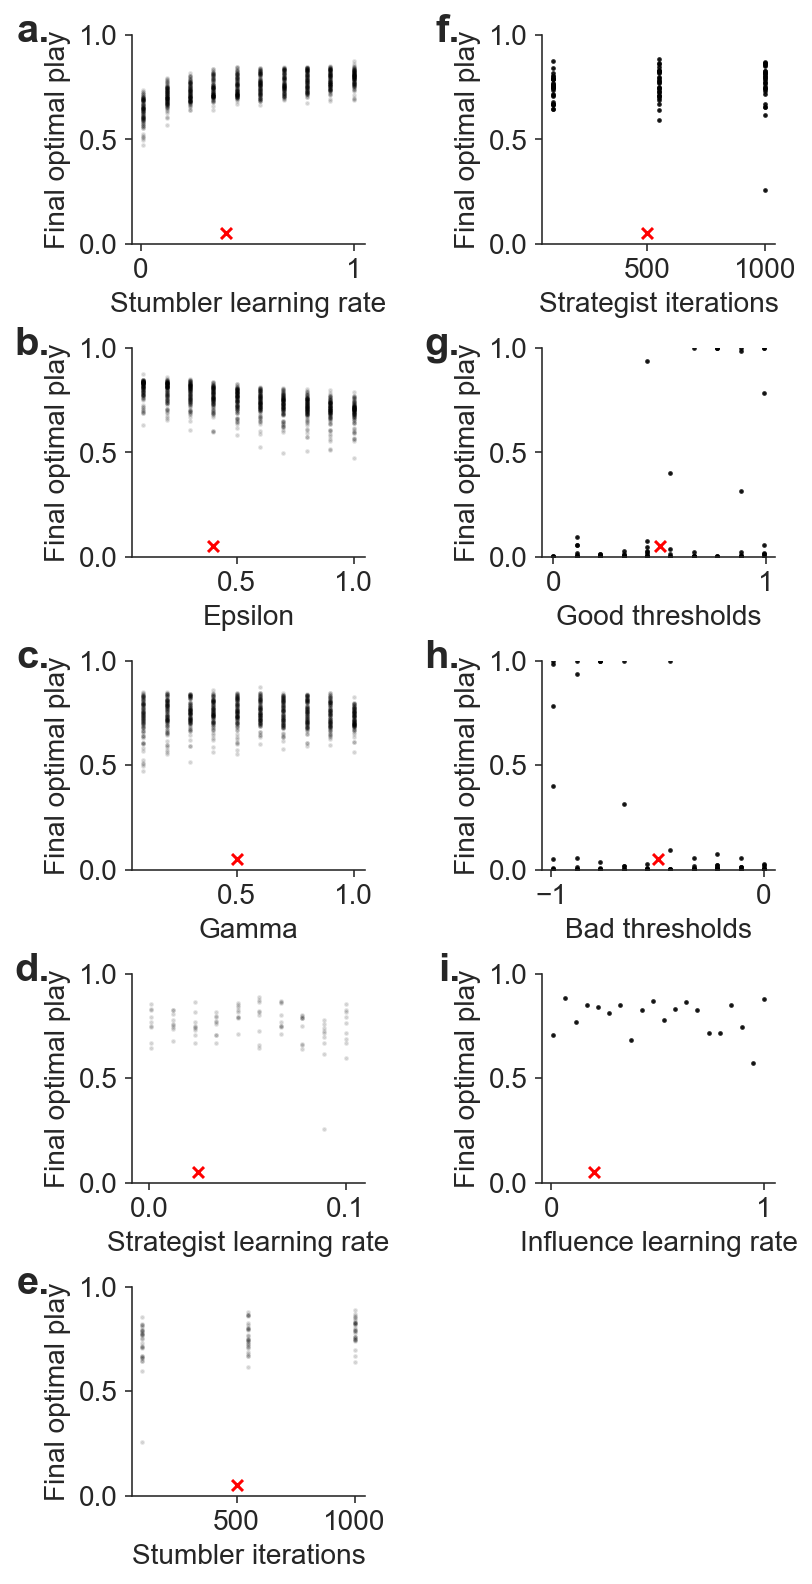

In [24]:
stumber_scores = [row[4] for row in exp_6]
stumbler_learning_rates = [row[3] for row in exp_6]
epsilons = [row[2] for row in exp_6]
gammas = [row[1] for row in exp_6]

strategist_scores = [row[-3] for row in exp_7]
strategist_learning_rates = [row[1] for row in exp_7]
num_stumbles = [row[2] for row in exp_7]
num_strategies = [row[3] for row in exp_7]

strategist_scores2 = [row[-2] for row in exp_8]
hot_thresholds = [row[1] for row in exp_8]
cold_thresholds = [row[2] for row in exp_8]

strategist_scores3 = [row[2] for row in exp_11]
influence_learning_rate = [row[1] for row in exp_11]

n_subplots = 9
fig, ax = plt.subplots(5, 2, figsize=(2*3, 2.25*5))

_ = ax[0, 0].scatter(stumbler_learning_rates, stumber_scores, color='black', alpha=0.1, s=2)
_ = ax[0, 0].scatter(x=0.4, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[0, 0].set_xlabel("Stumbler learning rate")
_ = ax[0, 0].set_ylabel("Final optimal play")
_ = ax[0, 0].set_ylim(0, 1)
_ = ax[0, 0].text(-0.35, 1.1, "a.", transform=ax[0, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[1, 0].scatter(epsilons, stumber_scores, color='black', alpha=0.1, s=2)
_ = ax[1, 0].scatter(x=0.4, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[1, 0].set_xlabel("Epsilon")
_ = ax[1, 0].set_ylabel("Final optimal play")
_ = ax[1, 0].set_ylim(0, 1)
_ = ax[1, 0].text(-0.35, 1.1, "b.", transform=ax[1, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[2, 0].scatter(gammas, stumber_scores, color='black', alpha=0.1, s=2)
_ = ax[2, 0].scatter(x=0.5, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[2, 0].set_xlabel("Gamma")
_ = ax[2, 0].set_ylabel("Final optimal play")
_ = ax[2, 0].set_ylim(0, 1)
_ = ax[2, 0].text(-0.35, 1.1, "c.", transform=ax[2, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[3, 0].scatter(strategist_learning_rates, strategist_scores, color='black', alpha=0.1, s=2)
_ = ax[3, 0].scatter(x=0.025, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[3, 0].set_xlabel("Strategist learning rate")
_ = ax[3, 0].set_ylabel("Final optimal play")
_ = ax[3, 0].set_ylim(0, 1)
_ = ax[3, 0].text(-0.35, 1.1, "d.", transform=ax[3, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[4, 0].scatter(num_stumbles, strategist_scores, color='black', alpha=0.1, s=2)
_ = ax[4, 0].scatter(x=500, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[4, 0].set_xlabel("Stumbler iterations")
_ = ax[4, 0].set_ylabel("Final optimal play")
_ = ax[4, 0].set_ylim(0, 1)
_ = ax[4, 0].text(-0.35, 1.1, "e.", transform=ax[4, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[0, 1].scatter(num_strategies, strategist_scores, color='black', alpha=0.8, s=2)
_ = ax[0, 1].scatter(x=500, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[0, 1].set_xlabel("Strategist iterations")
_ = ax[0, 1].set_ylabel("Final optimal play")
_ = ax[0, 1].set_ylim(0, 1)
_ = ax[0, 1].text(-0.35, 1.1, "f.", transform=ax[0, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[1, 1].scatter(hot_thresholds, strategist_scores2, color='black', alpha=0.8, s=2)
_ = ax[1, 1].scatter(x=0.5, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[1, 1].set_xlabel("Good thresholds")
_ = ax[1, 1].set_ylabel("Final optimal play")
_ = ax[1, 1].set_ylim(0, 1)
_ = ax[1, 1].text(-0.35, 1.1, "g.", transform=ax[1, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[2, 1].scatter(cold_thresholds, strategist_scores2, color='black', alpha=0.8, s=2)
_ = ax[2, 1].scatter(x=-0.5, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[2, 1].set_xlabel("Bad thresholds")
_ = ax[2, 1].set_ylabel("Final optimal play")
_ = ax[2, 1].set_ylim(0, 1)
_ = ax[2, 1].text(-0.35, 1.1, "h.", transform=ax[2, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[3, 1].scatter(influence_learning_rate, strategist_scores3, color='black', alpha=0.8, s=2)
_ = ax[3, 1].scatter(x=0.2, y=0.05, color="red", alpha=1, s=30, marker="x")
_ = ax[3, 1].set_xlabel("Influence learning rate")
_ = ax[3, 1].set_ylabel("Final optimal play")
_ = ax[3, 1].set_ylim(0, 1)
_ = ax[3, 1].text(-0.35, 1.1, "i.", transform=ax[3, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[4, 1].axis('off')

_ = sns.despine()
_ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=.5)

plt.savefig("figure_8.png", dpi=500, bbox_inches='tight')

# Fig 9. (rev 2, replaced)

DQN control experiments. Using both a ConvNet and a simpler MLP.

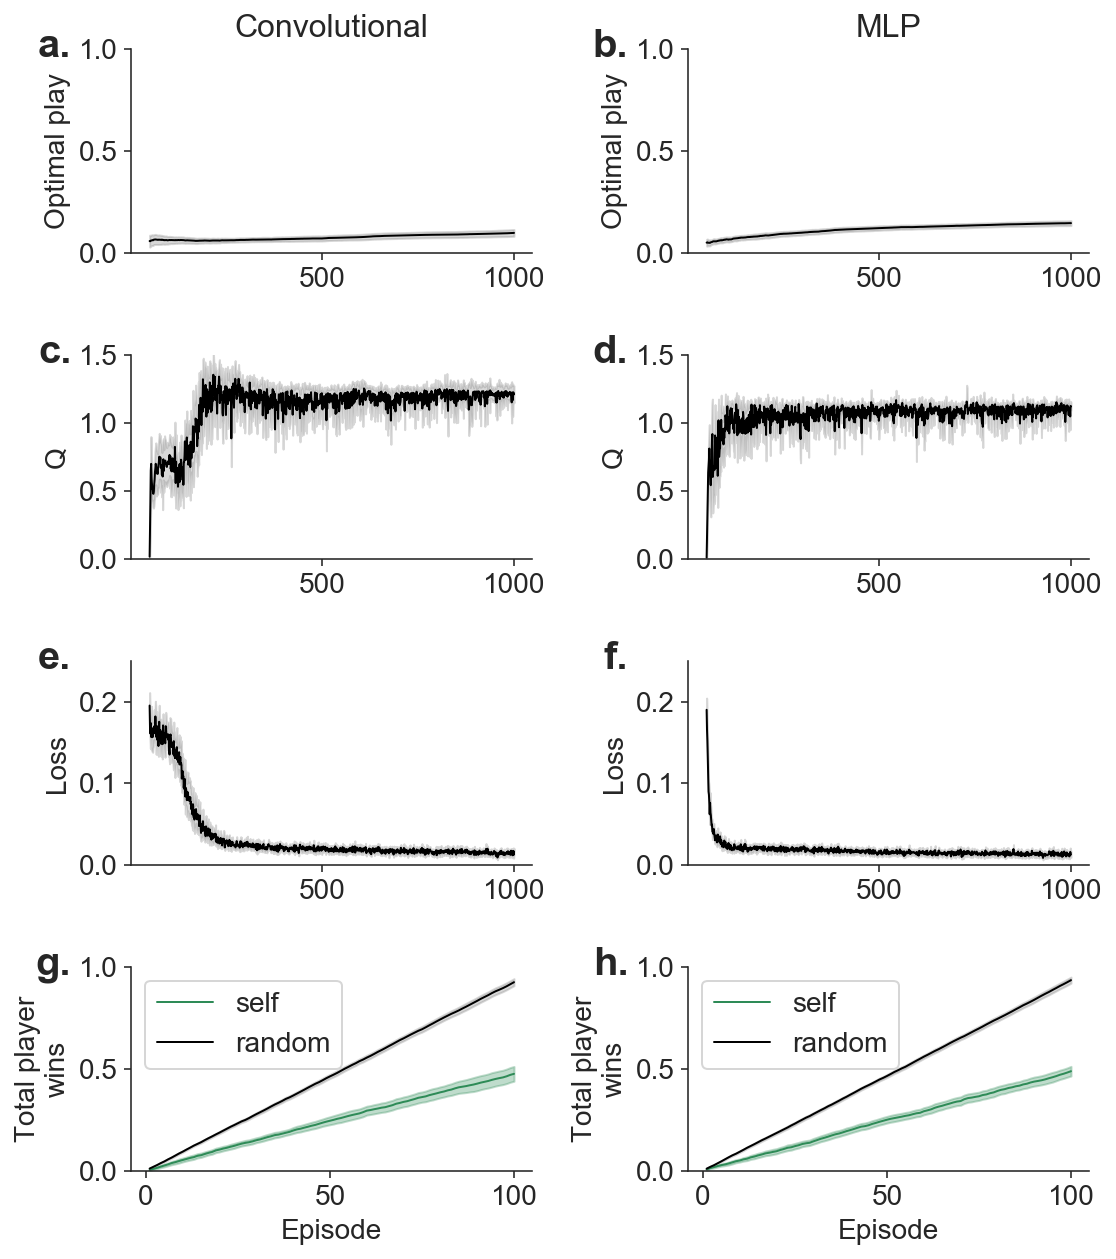

In [88]:
n_subplots = 9
fig, ax = plt.subplots(4, 2, figsize=(8, 9))

# Set column titles
_ = ax[0,0].set_title("Convolutional")
_ = ax[0,1].set_title("MLP")

# Score
key = 'score'
episode_56, exp_56_avg, exp_56_sem = score_summary(exp_56, key=key)
episode_58, exp_58_avg, exp_58_sem = score_summary(exp_58, key=key)
_ = ax[0, 0].plot(episode_56, exp_56_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="Conv")
_ = ax[0, 0].fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='grey', alpha=0.3)

_ = ax[0, 0].set_xlabel("")
_ = ax[0, 0].set_ylabel("Optimal play")
_ = ax[0, 0].set_ylim(0, 1)
_ = ax[0, 0].text(-0.15, 1.1, "a.", transform=ax[0, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[0, 1].plot(episode_58, exp_58_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="MLP")
_ = ax[0, 1].fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='grey', alpha=0.3)

_ = ax[0, 1].set_xlabel("")
_ = ax[0, 1].set_ylabel("Optimal play")
_ = ax[0, 1].set_ylim(0, 1)
_ = ax[0, 1].text(-0.15, 1.1, "b.", transform=ax[0, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Q
key = 'Q'
episode_56, exp_56_avg, exp_56_sem = score_summary(exp_56, key=key)
episode_58, exp_58_avg, exp_58_sem = score_summary(exp_58, key=key)
_ = ax[1, 0].plot(episode_56, exp_56_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="Conv")
_ = ax[1, 0].fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='grey', alpha=0.3)

_ = ax[1, 0].set_xlabel("")
_ = ax[1, 0].set_ylabel("Q")
_ = ax[1, 0].set_ylim(0, 1.5)
_ = ax[1, 0].text(-0.15, 1.1, "c.", transform=ax[1, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[1, 1].plot(episode_58, exp_58_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="MLP")
_ = ax[1, 1].fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='grey', alpha=0.3)

_ = ax[1, 1].set_xlabel("")
_ = ax[1, 1].set_ylabel("Q")
_ = ax[1, 1].set_ylim(0, 1.5)
_ = ax[1, 1].text(-0.15, 1.1, "d.", transform=ax[1, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# loss
key = 'loss'
episode_56, exp_56_avg, exp_56_sem = score_summary(exp_56, key=key)
episode_58, exp_58_avg, exp_58_sem = score_summary(exp_58, key=key)
_ = ax[2, 0].plot(episode_56, exp_56_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="Conv")
_ = ax[2, 0].fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='grey', alpha=0.3)

_ = ax[2, 0].set_xlabel("")
_ = ax[2, 0].set_ylabel("Loss")
_ = ax[2, 0].set_ylim(0, 0.25)
_ = ax[2, 0].text(-0.15, 1.1, "e.", transform=ax[2, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[2, 1].plot(episode_58, exp_58_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="MLP")
_ = ax[2, 1].fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='grey', alpha=0.3)

_ = ax[2, 1].set_xlabel("")
_ = ax[2, 1].set_ylabel("Loss")
_ = ax[2, 1].set_ylim(0, 0.25)
_ = ax[2, 1].text(-0.15, 1.1, "f.", transform=ax[2, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# wins
key = 'total_reward'
episode_56, exp_56_avg, exp_56_sem = score_summary(self_56, key=key)
exp_56_avg /= 100 
exp_56_sem /= 100
_ = ax[3, 0].plot(episode_56, exp_56_avg, linestyle="-", color='seagreen', alpha=1.0, linewidth=1, label="self")
_ = ax[3, 0].fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='seagreen', alpha=0.3)
episode_56, exp_56_avg, exp_56_sem = score_summary(random_56, key=key)
exp_56_avg /= 100 
exp_56_sem /= 100
_ = ax[3, 0].plot(episode_56, exp_56_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="random")
_ = ax[3, 0].fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='grey', alpha=0.3)

_ = ax[3, 0].legend()
_ = ax[3, 0].set_xlabel("Episode")
_ = ax[3, 0].set_ylabel("Total player\nwins")
_ = ax[3, 0].set_ylim(0, 1)
_ = ax[3, 0].text(-0.15, 1.1, "g.", transform=ax[3, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

episode_58, exp_58_avg, exp_58_sem = score_summary(self_58, key=key)
exp_58_avg /= 100 
exp_58_sem /= 100
_ = ax[3, 1].plot(episode_58, exp_58_avg, linestyle="-", color='seagreen', alpha=1.0, linewidth=1, label="self")
_ = ax[3, 1].fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='seagreen', alpha=0.3)

episode_58, exp_58_avg, exp_58_sem = score_summary(random_58, key=key)
exp_58_avg /= 100 
exp_58_sem /= 100
_ = ax[3, 1].plot(episode_58, exp_58_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="random")
_ = ax[3, 1].fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='grey', alpha=0.3)

_ = ax[3, 1].legend()
_ = ax[3, 1].set_xlabel("Episode")
_ = ax[3, 1].set_ylabel("Total player\nwins")
_ = ax[3, 1].set_ylim(0, 1)
_ = ax[3, 1].text(-0.15, 1.1, "h.", transform=ax[3, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')


# fmt plots
_ = sns.despine()
_ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=.5)

plt.savefig("figure_9_old.png", dpi=500, bbox_inches='tight')

# Fig. 9

Optimal performance of several DQN topo.
1. MLP - one hot 
2. MLP - cartesian
3. conv - one hot

In [26]:
import os
from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

In [27]:
def load_data(path, model, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"run_{model}_{int(r)}_monitor.csv")
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

mlp_hot = ["DQN_hot1", 
          "DQN_hot2", 
          "DQN_hot3", 
          "DQN_hot4", 
          "DQN_hot5"]       
mlp_hot_names = ["hot1", 
              "hot2", 
              "hot3", 
              "hot4", 
              "hot5"]

conv_hot = ["DQN_conv2", "DQN_conv3"]
conv_hot_names = ["conv1", "conv2"]
           
mlp_xy = ["DQN_xy1", 
          "DQN_xy2", 
          "DQN_xy3", 
          "DQN_xy4", 
          "DQN_xy5",  
          "DQN_optuna"]
mlp_xy_names = ["xy1", 
              "xy2", 
              "xy3", 
              "xy4", 
              "xy5",  
              "optuna (best)"]

path = "/Users/qualia/Code/azad/data/wythoff/exp63/"
exp_63 = {}
for model in mlp_hot + conv_hot:
    exp_63[model] = load_data(path, model, run_index=(2, 21))

path = "/Users/qualia/Code/azad/data/wythoff/exp73/"
exp_73 = {}
for model in mlp_xy:
    exp_73[model] = load_data(path, model, run_index=(2, 21))

In [29]:
def load_data(path, model, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"eval_DQN_optuna_{model}_{int(r)}_monitor.csv")
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

path = "/Users/qualia/Code/azad/data/wythoff/exp73/"

eval_73_opponents = ["self", 
                  "random", 
                  "optimal"] 

eval_73_envs = ["Wythoff5x5", 
                "Wythoff10x10",
                "Wythoff15x15",
                "Wythoff50x50", 
                "Wythoff100x100", 
                "Wythoff150x150", 
                "Wythoff200x200", 
                "Wythoff250x250", 
                "Wythoff300x300", 
                "Wythoff350x350",
                "Wythoff400x400", 
                "Wythoff450x450", 
                "Wythoff500x500"]
eval_73_envs_sizes = [
    5,
    10,
    15,
    50,
    100,
    150,
    200,
    250,
    300,
    350,
    400,
    450,
    500
]

eval_73_opp = {}
for model in eval_73_opponents:
    eval_73_opp[model] = load_data(path, model, run_index=(2, 21))

eval_73_env = {}
for model in eval_73_envs:
    eval_73_env[model] = load_data(path, f"transfer_{model}", run_index=(2, 21))

## Figure 9

All DQN models we tried

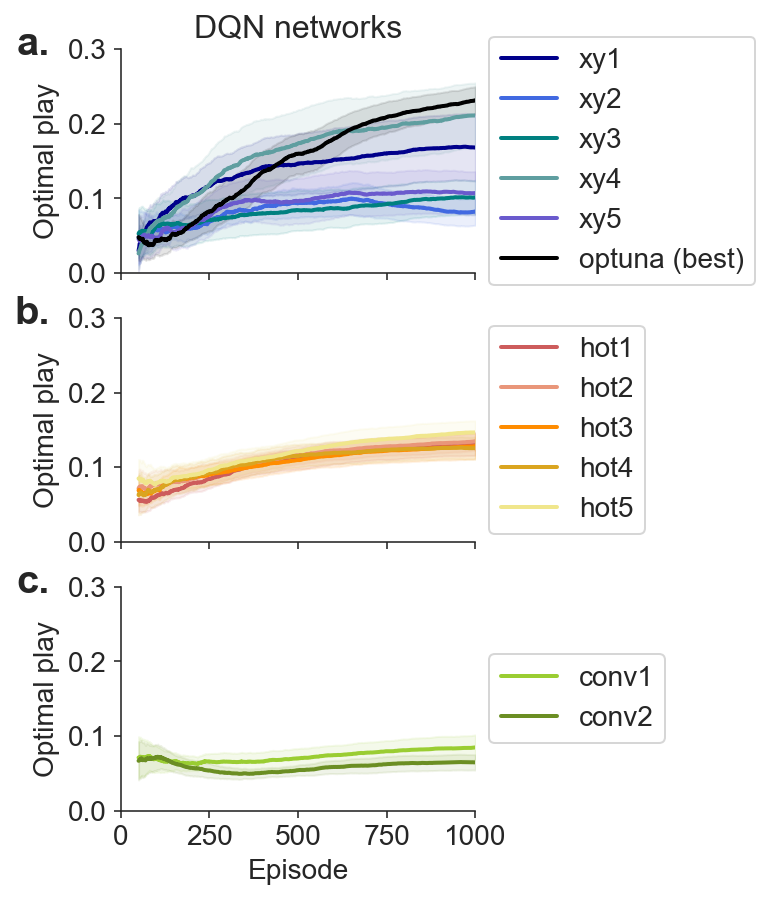

In [91]:
fig, ax = plt.subplots(3, 1, figsize=(6, 6.5), sharex=True, sharey=True)
_ = sns.despine()

# Set column titles
_ = ax[0].set_title("DQN networks")


# Score
key = 'score'

# -
colors = [ "darkblue", "royalblue", "teal", "cadetblue", "slateblue", "black"]
for color, model, name in zip(colors, mlp_xy, mlp_xy_names):
    episodes, avg, sem = score_summary(exp_73[model], key=key)
    _ = ax[0].plot(episodes, avg, linestyle="-", color=color, alpha=1.0, linewidth=2, label=name)
    _ = ax[0].fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color=color, alpha=0.1)
_ = ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_xlim(0, 1000)
_ = ax[0].set_ylim(0, .3)
_ = ax[0].text(-0.2, 1.1, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# -
colors = [ "indianred", "darksalmon", "darkorange", "goldenrod", "khaki"]
for color, model, name in zip(colors, mlp_hot, mlp_hot_names):
    episodes, avg, sem = score_summary(exp_63[model], key=key)
    _ = ax[1].plot(episodes, avg, linestyle="-", color=color, alpha=1.0, linewidth=2, label=name)
    _ = ax[1].fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color=color, alpha=0.1)
_ = ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_xlim(0, 1000)
_ = ax[1].set_ylim(0, .3)
_ = ax[1].text(-0.2, 1.1, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# -
colors = ["yellowgreen", "olivedrab", "olive"]
for color, model, name in zip(colors, conv_hot, conv_hot_names):
    episodes, avg, sem = score_summary(exp_63[model], key=key)
    _ = ax[2].plot(episodes, avg, linestyle="-", color=color, alpha=1.0, linewidth=2, label=name)
    _ = ax[2].fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color=color, alpha=0.1)
_ = ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax[2].set_xlabel("Episode")
_ = ax[2].set_ylabel("Optimal play")
_ = ax[2].set_ylim(0, .3)
_ = ax[2].set_xlim(0, 1000)
_ = ax[2].text(-0.2, 1.1, "c.", transform=ax[2].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# -
_ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=.2)

plt.savefig("figure_9.png", dpi=500, bbox_inches='tight')

# Figure 10

The best DQN model. Learning example and transfer performance

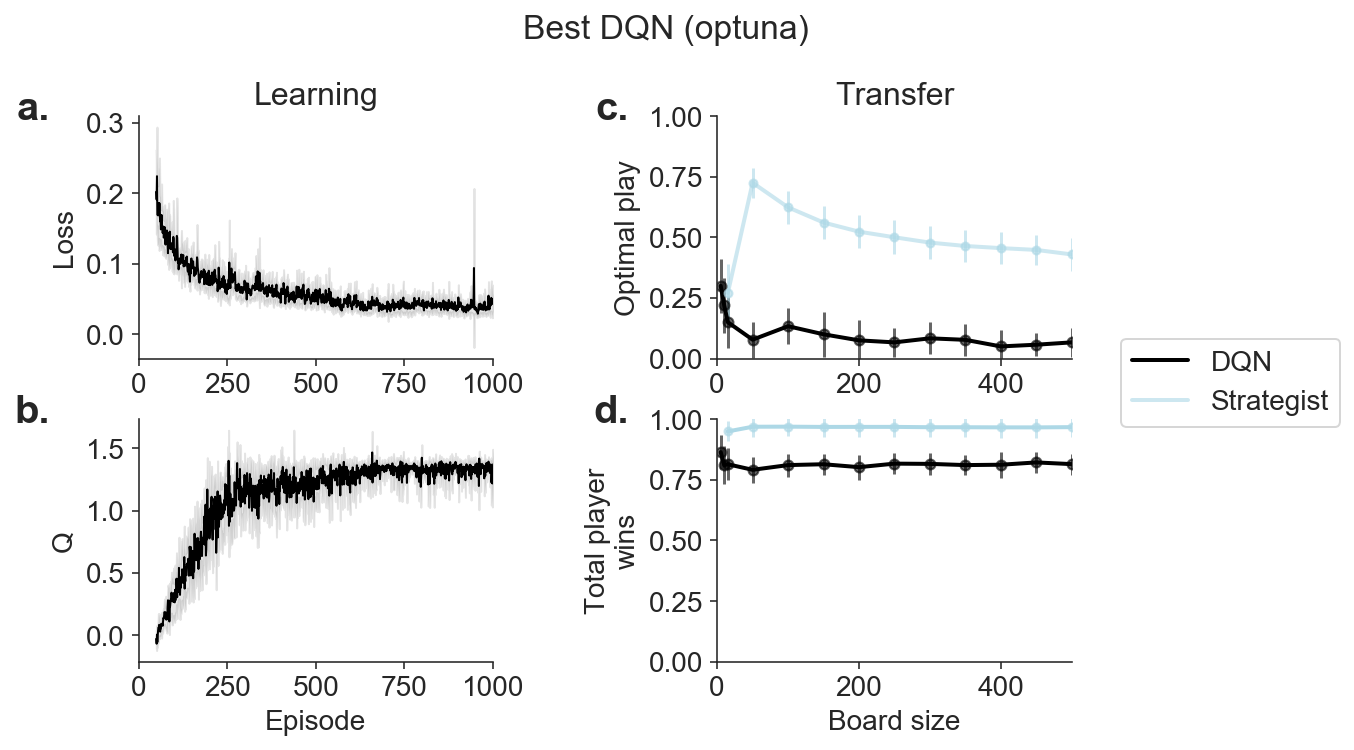

In [93]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex=False)
_ = sns.despine()

# Set column titles
fig.suptitle("Best DQN (optuna)", x=0.5, y=1.05)
_ = ax[0,0].set_title("Learning")
_ = ax[0,1].set_title("Transfer")

# -
key = 'loss'
episodes, avg, sem = score_summary(exp_73["DQN_optuna"], key=key)
_ = ax[0, 0].plot(episodes, avg, linestyle="-", color='black', alpha=1.0, linewidth=1)
_ = ax[0, 0].fill_between(episodes, 
                       avg + 2*sem, 
                       avg - 2*sem,
                       color='black', alpha=0.1)
_ = ax[0, 0].set_ylabel("Loss")
_ = ax[0, 0].text(-0.25, 1.1, "a.", transform=ax[0, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
_ = ax[0, 0].set_xlim(0, 1000)

# -
key = 'Q'
episodes, avg, sem = score_summary(exp_73["DQN_optuna"], key=key)
_ = ax[1, 0].plot(episodes, avg, linestyle="-", color='black', alpha=1.0, linewidth=1)
_ = ax[1, 0].fill_between(episodes, 
                       avg + 2*sem, 
                       avg - 2*sem,
                       color='black', alpha=0.1)
_ = ax[1, 0].set_xlabel("Episode")
_ = ax[1, 0].set_ylabel("Q")
_ = ax[1, 0].text(-0.25, 1.1, "b.", transform=ax[1, 0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
_ = ax[1, 0].set_xlim(0, 1000)

# -
key = 'score'

# DQN
ys = []
for i, (model, size) in enumerate(zip(eval_73_env, eval_73_envs_sizes)):
    # Stat
    episodes, avg, sem = score_summary(eval_73_env[model], key=key)
    i = np.argmax(avg)
    ys.append(avg[i])
    # Plot
    _ = ax[0, 1].errorbar(x=size, y=avg[i], yerr=2*sem[i], 
                          fmt='o', color='black', alpha=0.6, markersize=5)
_ = ax[0, 1].plot(eval_73_envs_sizes, ys, 
                  linestyle="-", linewidth=2, color='black', label="DQN")
_ = ax[0, 1].set_xlim(0, 500)
_ = ax[0, 1].set_ylim(0, 1)
_ = ax[0, 1].set_ylabel("Optimal play")

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["strategist_score"]))
    s.append(2*st.sem(v["strategist_score"]))
_ = ax[0, 1].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[0, 1].plot(g, m, '-', color='lightblue', linewidth=2, alpha=0.6, label="Strategist")
_ = ax[0, 1].legend(loc='center left', bbox_to_anchor=(1.1, -.1))
_ = ax[0, 1].text(-0.25, 1.1, "c.", transform=ax[0, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# -
key = 'total_reward'
num_episodes = 100
ys = []
for i, (model, size) in enumerate(zip(eval_73_env, eval_73_envs_sizes)):
    # Stats
    episodes, avg, sem = score_summary(eval_73_env[model], key=key)
    avg /= num_episodes
    sem /= num_episodes
    i = np.argmax(avg)
    ys.append(avg[i])
    
    # Plot
    _ = ax[1, 1].errorbar(x=size, y=avg[i], yerr=2*sem[i], 
                          fmt='o', color='black', alpha=0.6, markersize=5)
_ = ax[1, 1].plot(eval_73_envs_sizes, ys, linestyle="-", 
                      linewidth=2, color='black', label="Random")
# _ = ax[1, 1].set_xlim(0, 500)
_ = ax[1, 1].set_ylim(0, 1)
_ = ax[1, 1].set_ylabel("Total player\nwins")
_ = ax[1, 1].set_xlabel("Board size")
_ = ax[1, 1].text(-0.25, 1.1, "d.", transform=ax[1, 1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["wins"])/n_eval)
    s.append(2*st.sem(v["wins"])/n_eval)
_ = ax[1, 1].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[1, 1].plot(g, m, linestyle="-", linewidth=2, color='lightblue', label="Strategist")
_ = ax[1, 1].set_xlim(0, 500)

# -
_ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=.25)

plt.savefig("figure_10.png", dpi=500, bbox_inches='tight')